In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df= pd.read_csv(r"c:\Users\HP\Downloads\Heart_pred.csv")
df.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
for i in df:
    print(df.info(i))
    print(df.describe)
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
<bound method NDFrame.describe of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0     

In [17]:
df['sex'].value_counts()

sex
F    1025
Name: count, dtype: int64

In [5]:
df.shape

(1025, 14)

In [6]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df['sex'].value_counts()

sex
F    1025
Name: count, dtype: int64

In [8]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(numerical_features)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [9]:
object_features=df.select_dtypes(include=['object','category']).columns.tolist()
print(object_features)

[]


In [13]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [12]:
df['Heart Disease'] = df['target'].apply(lambda x: "Yes" if x == 1 else "No")

df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].apply(lambda x: "M" if x == 1 else "F")

In [15]:
df['sex'].value_counts()

sex
F    1025
Name: count, dtype: int64

<Figure size 800x600 with 0 Axes>

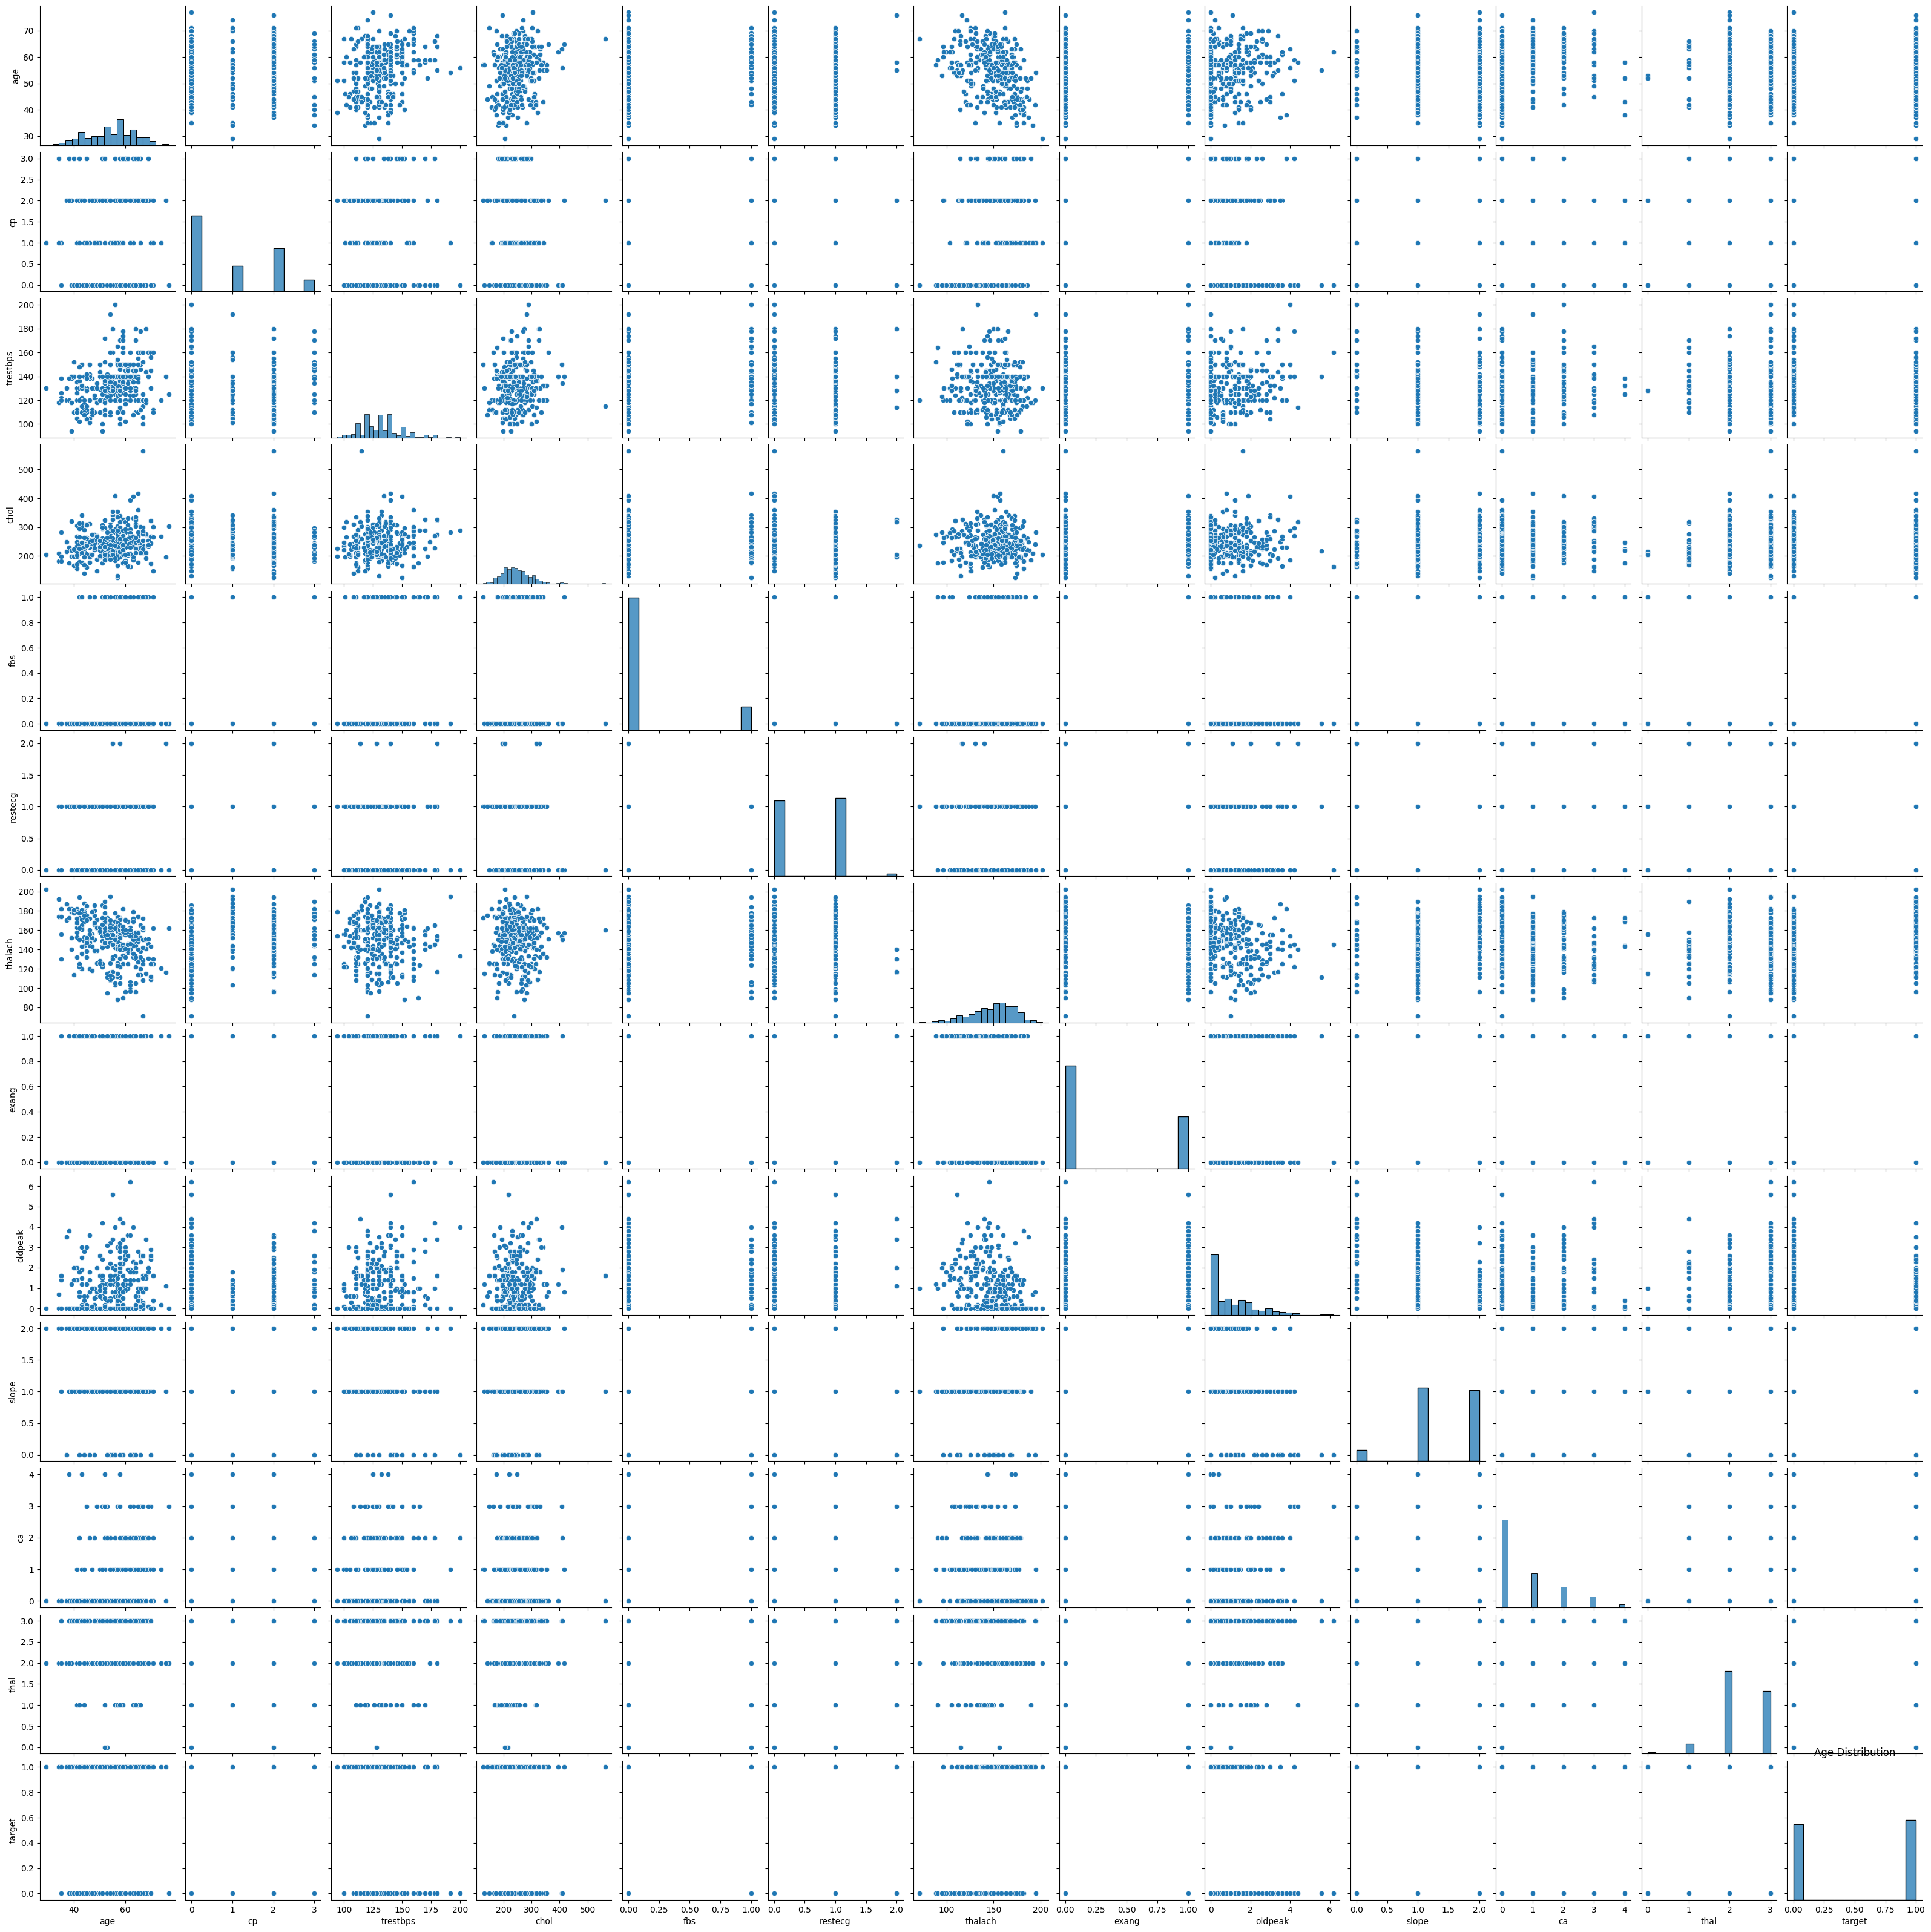

In [27]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.pairplot(data=df)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [19]:
df['age'].max()

77

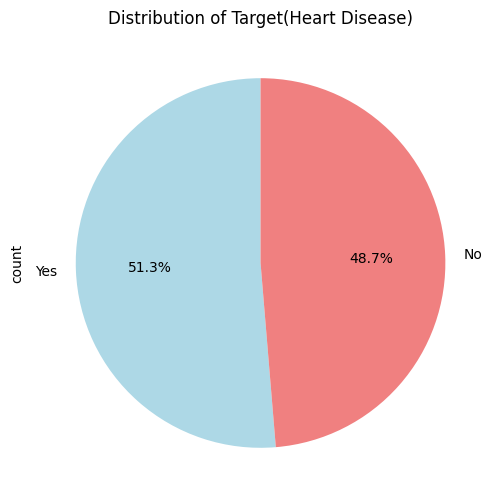

In [34]:
plt.figure(figsize=(8, 6))
df['Heart Disease'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Distribution of Target(Heart Disease)')

plt.show()

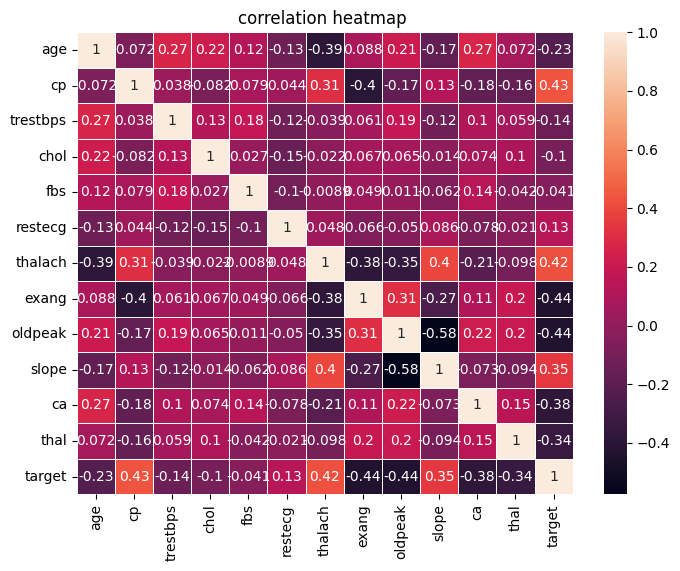

In [38]:
numerical_features=df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(8,6))
sns.heatmap(numerical_features.corr(), annot=True, linewidths=0.6)
plt.title('correlation heatmap ')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12304\4245224210.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='chol', data=df, palette='mako')


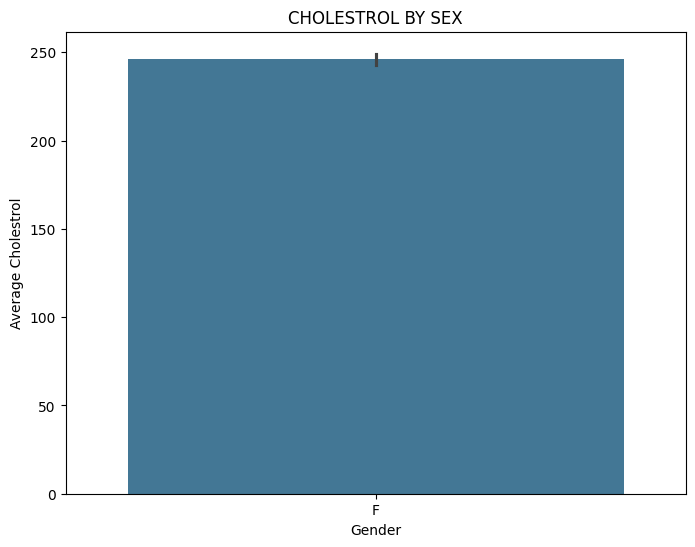

In [40]:
plt.figure(figsize=(8,6))
sns.barplot(x='sex', y='chol', data=df, palette='mako')
plt.title("CHOLESTROL BY SEX")
plt.xlabel("Gender")
plt.ylabel('Average Cholestrol')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_12304\3522787575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cp', y='age', data=df, palette='mako')


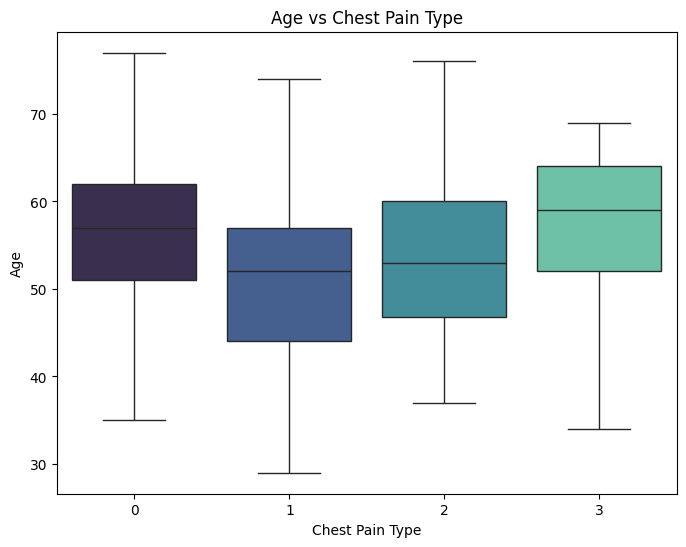

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='cp', y='age', data=df, palette='mako')
plt.title('Age vs Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.show()